<a href="https://colab.research.google.com/github/GustavoARodri/Apple-Predict-EDA/blob/main/predict_eda_pt_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTAÇÃO DO DATAFRAME**

In [ ]:
#Biblioteca de manipulação de dataframes e atribuição na variável
import pandas as pd

df = pd.read_csv("/content/apple_quality.csv")

In [ ]:
#Dataframe: A_id=index, Size=tamanho, Weight=peso, Sweetness=doçura, Cruchiness=crocância, Juiciness=suculência,
#Ripeness=maturação, Acidity=acidez, Quality=qualidade (good or bad).
#Os dados já estão padronizados, o objetivo é saber se a maça é boa ou ruim usando Machine learning, no caso prever a coluna Quality
df.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# **ANALISE E LIMPEZA DOS DADOS**

In [ ]:
#Alguns valores float e object, inesperado Acidity ser object então vou formata-lo para float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
#Transformei qualquer string dentro de Actidity que não seja numeros em NaN
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

In [ ]:
#Agora todos os atributos de entrada estão com float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(8), object(1)
memory usage: 281.4+ KB


In [ ]:
#sem valores duplicados
df.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4000
Quality           2
dtype: int64

In [ ]:
#verificação de valores nulos
df.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
Quality        1
dtype: int64

In [ ]:
#Eliminando linhas de valores nulos (já que são poucos)
df = df.dropna()

In [ ]:
#Novo dataframe sem valores nulos
df.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
#A coluna id não terá peso no modelo de IA já que é apenas o indice do dataframe então removi ela
df = df.drop("A_id", axis=1)

In [ ]:
#Novo dataframe sem a coluna A_id
df.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


In [ ]:
#Quality precisa ser transformado ou numeros para nosso modelo conseguir aprender, nesse caso utilizei a função map()
df['Quality'] = df['Quality'].map({'bad':0, 'good':1})

In [ ]:
#Quality mapeada com 0 (ruim) e 1 (boa)
df.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


# **ANÁLISE EXPLORATORIA (EDA)**

In [ ]:
#Bibliotecas de gráficos e análises de dados
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Target está bem balanceado
df['Quality'].value_counts()

Quality
1    2004
0    1996
Name: count, dtype: int64

In [ ]:
#Análise dos dados (Média, Desvio Padrão, Valor minimo, Valor máximo, etc...)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Size,4000.0,-0.503015,1.928059,-7.151703,-1.816765,-0.513703,0.805526,6.406367
Weight,4000.0,-0.989547,1.602507,-7.149848,-2.011770,-0.984736,0.030976,5.790714
Sweetness,4000.0,-0.470479,1.943441,-6.894485,-1.738425,-0.504758,0.801922,6.374916
Crunchiness,4000.0,0.985478,1.402757,-6.055058,0.062764,0.998249,1.894234,7.619852
Juiciness,4000.0,0.512118,1.930286,-5.961897,-0.801286,0.534219,1.835976,7.364403
Ripeness,4000.0,0.498277,1.874427,-5.864599,-0.771677,0.503445,1.766212,7.237837
Acidity,4000.0,0.076877,2.110270,-7.010538,-1.377424,0.022609,1.510493,7.404736
Quality,4000.0,0.501000,0.500062,0.000000,0.000000,1.000000,1.000000,1.000000


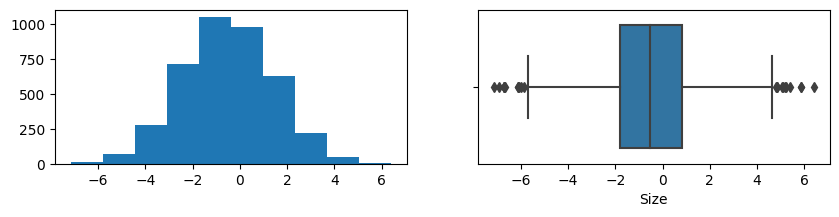

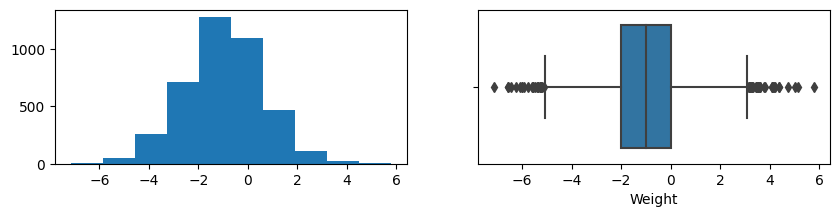

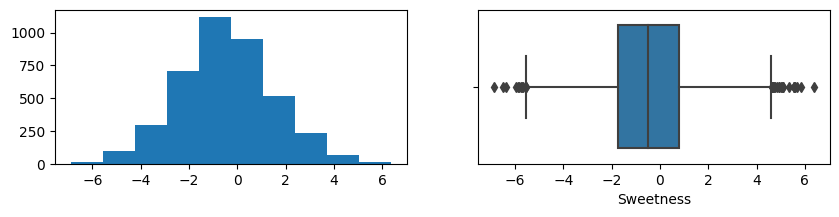

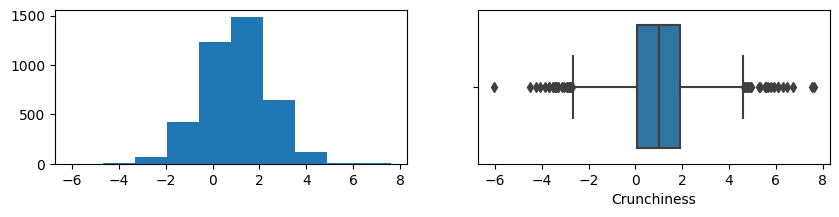

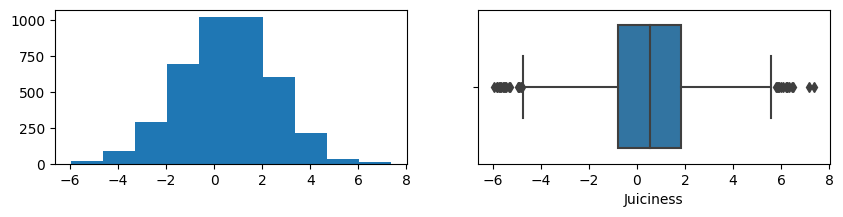

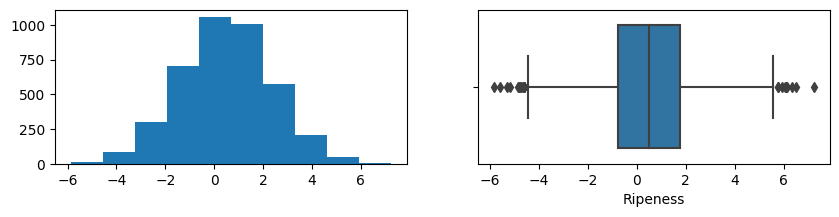

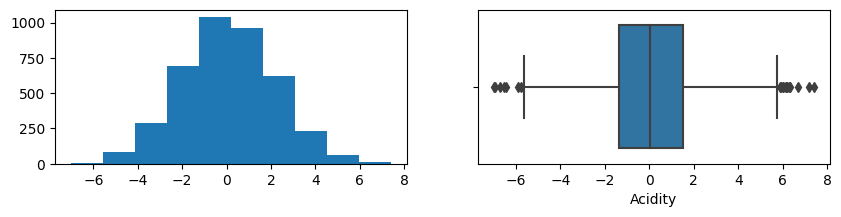

In [ ]:
#verificação de outliers
for i in range(7):
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    df.iloc[:, i].hist(grid=False)
    plt.subplot(1,2,2)
    sns.boxplot(x=df.iloc[:, i])
    plt.show()

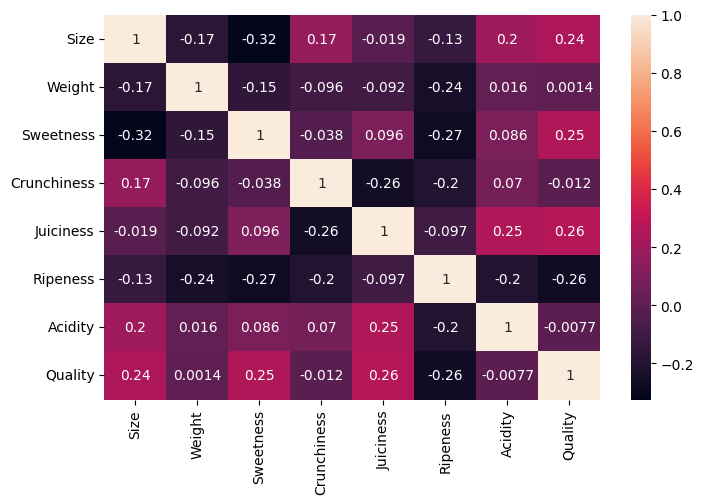

In [ ]:
#gráfico de correlação
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
#Bibliotecas para treinamento, divisão e accurácia
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#Atribui X como valores de entrada e y o valor de saída
X = df.drop('Quality', axis=1)
y = df['Quality']

#Instanciar os modelos
rfc = RandomForestClassifier(random_state=42, min_samples_split=4, n_jobs=-1)
svc = SVC(random_state=42, gamma='auto')
knn = KNeighborsClassifier(n_neighbors=9, weights='distance', n_jobs=-1)
dt = DecisionTreeClassifier(random_state=42, max_depth=13)

#Treinamento e validação cruzada usando k-fold
rfc_predict = cross_val_predict(rfc, X, y, cv=5)
svc_predict = cross_val_predict(svc, X, y, cv=5)
knn_predict = cross_val_predict(knn, X, y, cv=5)
dt_predict = cross_val_predict(dt, X, y, cv=5)

#Acurácia dos modelos
print("Random Forest Acurácia Média: {:.1f}%".format((accuracy_score(y, rfc_predict)) * 100))
print("SVC Acurácia Média: {:.1f}%".format((accuracy_score(y, svc_predict)) * 100))
print("KNN Acurácia Média: {:.1f}%".format((accuracy_score(y, knn_predict)) * 100))
print("Decision Tree Acurácia Média: {:.1f}%".format((accuracy_score(y, dt_predict)) * 100))

Random Forest Acurácia Média: 88.9%
SVC Acurácia Média: 91.4%
KNN Acurácia Média: 89.8%
Decision Tree Acurácia Média: 81.3%


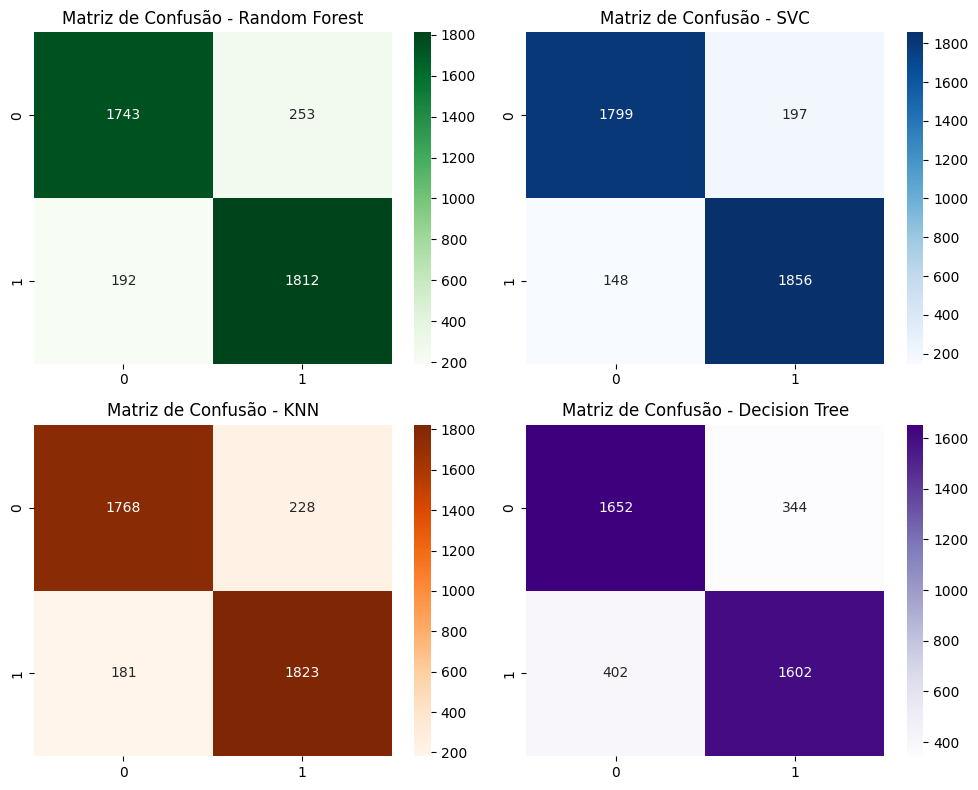

In [ ]:
#Matriz de Confusão, Branco são os erros, e os coloridos são acertos
#O eixo X é a previsão e o eixo Y é o rótulo verdadeiro
cmRFC = confusion_matrix(y, rfc_predict)
cmSVC = confusion_matrix(y, svc_predict)
cmKNN = confusion_matrix(y, knn_predict)
cmDT = confusion_matrix(y, dt_predict)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.heatmap(cmRFC, annot=True, cmap='Greens', fmt='g', ax=axes[0, 0])
axes[0, 0].set_title('Matriz de Confusão - Random Forest')

sns.heatmap(cmSVC, annot=True, cmap='Blues', fmt='g', ax=axes[0, 1])
axes[0, 1].set_title('Matriz de Confusão - SVC')

sns.heatmap(cmKNN, annot=True, cmap='Oranges', fmt='g', ax=axes[1, 0])
axes[1, 0].set_title('Matriz de Confusão - KNN')

sns.heatmap(cmDT, annot=True, cmap='Purples', fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Matriz de Confusão - Decision Tree')

plt.tight_layout()

plt.show()

In [ ]:
print("Melhor modelo:\n SVC: {:.1f}%\n".format((accuracy_score(y, svc_predict)) * 100))
print("Pior modelo:\n Decision Tree: {:.1f}%".format((accuracy_score(y, dt_predict)) * 100))

Melhor modelo:
 SVC: 91.4%

Pior modelo:
 Decision Tree: 81.3%
